**Genomics Notebook v1**  
This notebook is part of the materials distributed with [Genomics in the Cloud](https://oreil.ly/genomics-cloud), an O'Reilly book by Geraldine A. Van der Auwera and Brian D. O'Connor. You can read it [online in the O'Reilly library](https://learning.oreilly.com/library/view/genomics-in-the/9781491975183/)
or [order the hardcopy on Amazon](https://www.amazon.com/Genomics-Cloud-GATK-Spark-Docker/dp/1491975199/). The notebook can be used on its own; the book provides additional context, instructions and discussion.

**Runtime configuration**   
The exercises in this notebook were developed in a default [Terra](https://app.terra.bio/) runtime environmen (Jan 14 2020) complemented by a startup script that installs GATK version 4.1.3.0 and an IGV plugin (available [here](gs://genomics-in-the-cloud/v1/scripts/install_GATK_4130_with_igv.sh)). Refer to the book or to Terra documentation for detailed instructions on filling out the runtime customization form. 

**Kernel**  
By default this notebook opens on a Python 3 kernel. When you have the notebook running in EDIT mode, the upper right corner of the notebook (under the Notebook Runtime widget) should display the label `Python3`. 

----

# Getting Started with Jupyter in Terra
In this section, we run through some exercises to familiarize you with the basic usage of Jupyter notebooks in the Terra environment.


## Running the Hello World Cells
We start with some simple Hello World examples, first in Python, then using magic methods to do the equivalent in R and with a command-line tool call.

### Python Hello World

*Cell 1: Run the basic Hello World in Python*

In [1]:
print("Hello World!")

Hello World!


*Cell 2: Use a variable to parameterize the greeting*

In [2]:
greeting = "Hello World!"
print(greeting)

Hello World!


*Cells 3 and 4: Separate the variable declaration and `print` command to demonstrate that state is conserved across cells*

In [3]:
greeting = "Hello World!"

In [4]:
print(greeting)

Hello World!


### R Hello World using Python magic methods

*Cell 5: Import the `rpy` package and activate the notebook extension*

In [5]:
import rpy2
%load_ext rpy2.ipython

*Cell 6: Run the R Hello World with single-line R interpretation using `%R`*

In [6]:
%R print ("Hello World!")

[1] "Hello World!"


array(['Hello World!'], dtype='<U12')

*Cell 7: Run the R Hello World with a variable and with whole-cell R interpretation using `%%R`*

In [7]:
%%R
greeting <- "Hello World!"
print(greeting)

[1] "Hello World!"


### Command-line tool Hello World using Python magic methods

*Cell 8: Run the command-line tool `echo` using `!`*

In [8]:
! echo "Hello World!"

Hello World!


## Using gsutil to Interact with Google Cloud Storage Buckets
Now that we know how to call command-line tool from the notebook, we look at how to pull in data from GCS buckets 

*Cell 9: List the bucket contents*

In [9]:
! gsutil ls gs://genomics-in-the-cloud/

gs://genomics-in-the-cloud/hello.txt
gs://genomics-in-the-cloud/v1/


*Cell 10: Copy a file from the bucket to the notebook's local storage*

In [10]:
! gsutil cp gs://genomics-in-the-cloud/hello.txt .

Copying gs://genomics-in-the-cloud/hello.txt...
/ [1 files][   20.0 B/   20.0 B]                                                
Operation completed over 1 objects/20.0 B.                                       


*Cell 11: Read the contents of a locally-stored text file*

In [11]:
! cat hello.txt

HELLO, DEAR READER!


## Setting Up a Variable Pointing to the Germline Data in the Book Bucket
We're going to want to access the data in the bucket multiple times, so we make a variable to avoid hardcoding and repeating file paths.

*Cell 12: Create a Python variable*

In [12]:
GERM_DATA = "gs://genomics-in-the-cloud/v1/data/germline"

*Cell 13: Use the variable to list the bucket contents*  
*(Erratum: this cell was erroneously numbered 14 in the initial print run)*

In [13]:
! gsutil ls {GERM_DATA}

gs://genomics-in-the-cloud/v1/data/germline/bams/
gs://genomics-in-the-cloud/v1/data/germline/gvcfs/
gs://genomics-in-the-cloud/v1/data/germline/intervals/
gs://genomics-in-the-cloud/v1/data/germline/ref/
gs://genomics-in-the-cloud/v1/data/germline/resources/
gs://genomics-in-the-cloud/v1/data/germline/vcfs/


*Cell 14: List the `bams` directory to get the paths of the files it contains*

In [14]:
! gsutil ls {GERM_DATA}/bams

gs://genomics-in-the-cloud/v1/data/germline/bams/father.bai
gs://genomics-in-the-cloud/v1/data/germline/bams/father.bam
gs://genomics-in-the-cloud/v1/data/germline/bams/mother.bai
gs://genomics-in-the-cloud/v1/data/germline/bams/mother.bam
gs://genomics-in-the-cloud/v1/data/germline/bams/motherNEX.bai
gs://genomics-in-the-cloud/v1/data/germline/bams/motherNEX.bam
gs://genomics-in-the-cloud/v1/data/germline/bams/motherRnaseq.bai
gs://genomics-in-the-cloud/v1/data/germline/bams/motherRnaseq.bam
gs://genomics-in-the-cloud/v1/data/germline/bams/son.bai
gs://genomics-in-the-cloud/v1/data/germline/bams/son.bam


*Cell 15: Copy the BAM file and index for the mother*

In [15]:
! gsutil cp {GERM_DATA}/bams/mother.ba* .

Copying gs://genomics-in-the-cloud/v1/data/germline/bams/mother.bai...
Copying gs://genomics-in-the-cloud/v1/data/germline/bams/mother.bam...          
/ [2 files][ 23.8 MiB/ 23.8 MiB]                                                
Operation completed over 2 objects/23.8 MiB.                                     


*Cell 16: List the local working directory to confirm the success of the copy operation*

In [16]:
! ls .

Genomics-Notebook-executed.ipynb  hello.txt   mother.bam
Genomics-Notebook.ipynb		  mother.bai


## Setting Up a Sandbox and Saving Output Files to the Workspace Bucket
Now that we know how to bring in data, let's go over how we're going to save the outputs of any analyses we run.

*Cell 17: Create a new directory, ignoring any errors if the path already exists (`-p`)*

In [17]:
! mkdir -p sandbox/

*Cell 18: Move the mother BAM and index files that we copied earlier to the sandbox*

In [18]:
! mv mother.ba* sandbox/

*Cell 19: List the contents of the sandbox to check that everything is where you expect it to be*

In [19]:
! ls sandbox

mother.bai  mother.bam


*Cell 20: Import the `os` package, look up the value of the `WORKSPACE_BUCKET` environment variable (set by Terra at the kernel level) and store it in a Python variable for easy access*

In [20]:
import os
WS_BUCKET = os.environ['WORKSPACE_BUCKET']

*Cell 21: Check the value of your new variable*

In [21]:
print(WS_BUCKET)

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5


*Cell 22: List the full (`-r`) contents of the workspace bucket (results will depend on what other work you have done in your workspace)*

In [22]:
! gsutil ls -r {WS_BUCKET}

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/2aee6d49-9c1e-401c-87a8-809f4d95f8ee/:

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/2aee6d49-9c1e-401c-87a8-809f4d95f8ee/ScatterHaplotypeCallerGVCF/:

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/2aee6d49-9c1e-401c-87a8-809f4d95f8ee/ScatterHaplotypeCallerGVCF/8bbf6fd6-6894-4e91-8a45-944a7818aa9a/:

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/2aee6d49-9c1e-401c-87a8-809f4d95f8ee/ScatterHaplotypeCallerGVCF/8bbf6fd6-6894-4e91-8a45-944a7818aa9a/call-HaplotypeCallerGVCF/:

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/2aee6d49-9c1e-401c-87a8-809f4d95f8ee/ScatterHaplotypeCallerGVCF/8bbf6fd6-6894-4e91-8a45-944a7818aa9a/call-HaplotypeCallerGVCF/shard-0/:

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/2aee6d49-9c1e-401c-87a8-809f4d95f8ee/ScatterHaplotypeCallerGVCF/8bbf6fd6-6894-4e91-8a45-944a7818aa9a/call-HaplotypeCallerGVCF/shard-0/cacheCopy/:
gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/2aee6d49-9c1e-401c-87a8-809f4d95f8ee/ScatterHaplotypeCallerGVC


gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/4fad98a4-61d8-46be-9539-66dcbcce16d5/ScatterHaplotypeCallerGVCF/:

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/4fad98a4-61d8-46be-9539-66dcbcce16d5/ScatterHaplotypeCallerGVCF/3f7542f1-7bf1-474a-be18-b48249194afb/:

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/4fad98a4-61d8-46be-9539-66dcbcce16d5/ScatterHaplotypeCallerGVCF/3f7542f1-7bf1-474a-be18-b48249194afb/call-HaplotypeCallerGVCF/:

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/4fad98a4-61d8-46be-9539-66dcbcce16d5/ScatterHaplotypeCallerGVCF/3f7542f1-7bf1-474a-be18-b48249194afb/call-HaplotypeCallerGVCF/shard-0/:

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/4fad98a4-61d8-46be-9539-66dcbcce16d5/ScatterHaplotypeCallerGVCF/3f7542f1-7bf1-474a-be18-b48249194afb/call-HaplotypeCallerGVCF/shard-0/cacheCopy/:
gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/4fad98a4-61d8-46be-9539-66dcbcce16d5/ScatterHaplotypeCallerGVCF/3f7542f1-7bf1-474a-be18-b48249194afb/call-HaplotypeCallerGVCF/shard-0/cacheCopy/Ha


gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/4fad98a4-61d8-46be-9539-66dcbcce16d5/ScatterHaplotypeCallerGVCF/55c2c528-dc74-4092-a86c-770ec8f7b523/call-HaplotypeCallerGVCF/:

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/4fad98a4-61d8-46be-9539-66dcbcce16d5/ScatterHaplotypeCallerGVCF/55c2c528-dc74-4092-a86c-770ec8f7b523/call-HaplotypeCallerGVCF/shard-0/:

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/4fad98a4-61d8-46be-9539-66dcbcce16d5/ScatterHaplotypeCallerGVCF/55c2c528-dc74-4092-a86c-770ec8f7b523/call-HaplotypeCallerGVCF/shard-0/cacheCopy/:
gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/4fad98a4-61d8-46be-9539-66dcbcce16d5/ScatterHaplotypeCallerGVCF/55c2c528-dc74-4092-a86c-770ec8f7b523/call-HaplotypeCallerGVCF/shard-0/cacheCopy/HaplotypeCallerGVCF-0.log
gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/4fad98a4-61d8-46be-9539-66dcbcce16d5/ScatterHaplotypeCallerGVCF/55c2c528-dc74-4092-a86c-770ec8f7b523/call-HaplotypeCallerGVCF/shard-0/cacheCopy/father.scatter.g.vcf
gs://fc-05197002-9c75-469b-

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/notebooks/Genomics-Notebook-executed.ipynb
gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/notebooks/Genomics-Notebook.ipynb


*Cell 23: Copy the contents of your sandbox to the workspace bucket (using `-m` for efficient transfer)*

In [23]:
! gsutil -m cp -r sandbox {WS_BUCKET}

Copying file://sandbox/mother.bam [Content-Type=application/octet-stream]...
Copying file://sandbox/mother.bai [Content-Type=application/octet-stream]...
/ [2/2 files][ 23.8 MiB/ 23.8 MiB] 100% Done                                    
Operation completed over 2 objects/23.8 MiB.                                     


*Cell 24: List the contents of the copy of your sandbox that is now stored in the bucket*

In [24]:
! gsutil ls {WS_BUCKET}/sandbox

gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/sandbox/mother.bai
gs://fc-05197002-9c75-469b-9ef5-0a0150773ed5/sandbox/mother.bam


This completes the "getting started" portion of this notebook.

----

# Visualizing Genomic Data in an Embedded IGV Window
In this section, we embed IGV windows in the notebook in order to visualize genomic data without leaving the notebook environment.

## Setting Up the Embedded IGV Browser
First we need to import the IGV package and initialize a browser window.

*Cell 25: Import the IGV package*

In [25]:
import igv

*Cell 26: Initialize the browser instance with a genome reference and an interval to focus on (optional)*

In [26]:
IGV_Explore = igv.Browser(
{"genome": "hg19",
"locus": "chr20:10,025,584-10,036,143"
}
)

*Cell 27: Display the browser window*

In [27]:
IGV_Explore.show()

*Cells 27: show the browser instance, subsequent updates will render here but we're showing the intial output below cell 27.*

![cell_27](https://github.com/broadinstitute/genomics-in-the-cloud/raw/master/production/notebook_images/cell_27.png)

## Adding Data to the IGV Browser
Now we can add data by pointing to files in a GCS bucket.

*Cells 28 and 29: Define data tracks for two BAM files (whole genome and exome versions of the mother sample)*

In [28]:
IGV_Explore.load_track(
{
"name": "Mother WGS",
"url": GERM_DATA + "/bams/mother.bam",
"indexURL": GERM_DATA + "/bams/mother.bai",
"format": "bam"
})

*Cell 28: shows what the browser looks like after loading the mother's bam file.  Keep in mind, when you run the notebook you will see this loaded in the previous IGV browser.*

![cell_28](https://github.com/broadinstitute/genomics-in-the-cloud/raw/master/production/notebook_images/cell_28.png)

In [29]:
IGV_Explore.load_track(
{
"name": "Mother Exome",
"url": GERM_DATA + "/bams/motherNEX.bam",
"indexURL": GERM_DATA + "/bams/motherNEX.bai",
"format": "bam"
})

*Cell 29: shows what the browser looks like after loading the mother's exome bam file.  Keep in mind, when you run the notebook you will see this loaded in the previous IGV browser.*

![cell_29](https://github.com/broadinstitute/genomics-in-the-cloud/raw/master/production/notebook_images/cell_29.png)

## Setting Up an Access Token to View Private Data
IGV needs an access token to retrieve data from private buckets (including the workspace bucket).

*Cell 30: Emit an acces token and save it to a file*

In [30]:
!gcloud auth print-access-token > token.txt

**Important note:** As long as this file is saved only to your notebook’s local storage, it is secure because
your runtime environment is strictly personal to you and cannot be accessed by others,
even if you share your workspace or your notebook with them. But don’t save this
file to your workspace bucket! Saving it to the bucket would make it visible to anyone
with whom you share the workspace.

*Cell 31: Read the contents of the token file into a Python variable*

In [31]:
token_file = open("token.txt","r") 
token = token_file.readline()

*Cell 32: Include the token in the track definition of any private files*

In [32]:
IGV_Explore.load_track(
{
"name": "Workspace bucket copy of Mother WGS",
"url": WS_BUCKET + "/sandbox/mother.bam",
"indexURL": WS_BUCKET + "/sandbox/mother.bai",
"format": "bam",
"oauthToken": token
})

*Cell 32: shows what the browser looks like after loading the workspace bucket copy of the mother's bam.  Keep in mind, when you run the notebook you will see this loaded in the previous IGV browser.*

![cell_32](https://github.com/broadinstitute/genomics-in-the-cloud/raw/master/production/notebook_images/cell_32.png)

This concludes the section on visualizing genomic data.

----

# Running GATK Commands to Learn, Test, or Troubleshoot
Now let's look at how we can run GATK commands inside the notebook.

## Running a Basic GATK Command: HaplotypeCaller
First we run a simple command like we did in Chapter 5, except we're running directly on the files located in GCS instead of localizing them first.

*Cell 33: Run HaplotypeCaller on files in GCS*

In [33]:
! gatk HaplotypeCaller \
-R {GERM_DATA}/ref/ref.fasta \
-I {GERM_DATA}/bams/mother.bam \
-O sandbox/mother_variants.200k.vcf.gz \
-L 20:10,000,000-10,200,000

Using GATK jar /etc/gatk-4.1.3.0/gatk-package-4.1.3.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /etc/gatk-4.1.3.0/gatk-package-4.1.3.0-local.jar HaplotypeCaller -R gs://genomics-in-the-cloud/v1/data/germline/ref/ref.fasta -I gs://genomics-in-the-cloud/v1/data/germline/bams/mother.bam -O sandbox/mother_variants.200k.vcf.gz -L 20:10,000,000-10,200,000
03:14:52.239 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/etc/gatk-4.1.3.0/gatk-package-4.1.3.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
03:14:52.805 INFO  HaplotypeCaller - ------------------------------------------------------------
03:14:52.806 INFO  HaplotypeCaller - The Genome Analysis Toolkit (GATK) v4.1.3.0
03:14:52.806 INFO  HaplotypeCaller - For support and documentation go to https://software.broadinstitute.org/gatk/
03:14:52.806 INFO  HaplotypeCa

*Cell 34: Verify that the output file is in the sandbox*

In [34]:
! ls sandbox

mother.bai  mother_variants.200k.vcf.gz
mother.bam  mother_variants.200k.vcf.gz.tbi


**Note:** This works with GATK from anywhere with an internet connection! We could even write the output directly to a GCS bucket if we wanted to; the output filepath just has to start with a valid `gs://` bucket address. 

## Loading the Data (BAM and VCF) into IGV
Now we do a simple visual check of the result.

*Cell 35: Initialize a new IGV window*

In [35]:
IGV_InspectCalls = igv.Browser(
{"genome": "hg19",
"locus": "chr20:10,002,294-10,002,623"
}
)

IGV_InspectCalls.show()

*Cell 35: shows what the browser looks like after moving to a specific locus.*

![cell_35](https://github.com/broadinstitute/genomics-in-the-cloud/raw/master/production/notebook_images/cell_35.png)

*Cell 36: Load the variant calls produced by the HaplotypeCaller above*

In [36]:
IGV_InspectCalls.load_track(
{
"name": "Mother variants",
"url": "files/sandbox/mother_variants.200k.vcf.gz",
"indexURL": "files/sandbox/mother_variants.200k.vcf.gz.tbi",
"format": "vcf"
})

*Cell 36: shows what the browser looks like after loading the mother's variants.  Keep in mind, when you run the notebook you will see this loaded in the previous IGV browser.*

![cell_36](https://github.com/broadinstitute/genomics-in-the-cloud/raw/master/production/notebook_images/cell_36.png)

*Cell 37: Load the original BAM file on which you ran HaplotypeCaller*

In [37]:
IGV_InspectCalls.load_track(
{
"name": "Mother WGS",
"url": GERM_DATA + "/bams/mother.bam",
"indexURL": GERM_DATA + "/bams/mother.bai",
"format": "bam"
})

*Cell 37: shows what the browser looks like after loading the mother's bam.  Keep in mind, when you run the notebook you will see this loaded in the previous IGV browser.*

![cell_37](https://github.com/broadinstitute/genomics-in-the-cloud/raw/master/production/notebook_images/cell_37.png)

## Troubleshooting a Questionable Variant Call in the Embedded IGV Browser
Something looks odd so we do some systematic troubleshooting...

*Cell 38: Run HaplotypeCaller on the problem region to produce an output BAM, the `bamout`*

In [38]:
! gatk HaplotypeCaller \
-R {GERM_DATA}/ref/ref.fasta \
-I {GERM_DATA}/bams/mother.bam \
-O sandbox/motherHCdebug.vcf \
-bamout sandbox/motherHCdebug.bam \
-L 20:10,002,000-10,003,000

Using GATK jar /etc/gatk-4.1.3.0/gatk-package-4.1.3.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /etc/gatk-4.1.3.0/gatk-package-4.1.3.0-local.jar HaplotypeCaller -R gs://genomics-in-the-cloud/v1/data/germline/ref/ref.fasta -I gs://genomics-in-the-cloud/v1/data/germline/bams/mother.bam -O sandbox/motherHCdebug.vcf -bamout sandbox/motherHCdebug.bam -L 20:10,002,000-10,003,000
03:18:36.343 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/etc/gatk-4.1.3.0/gatk-package-4.1.3.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
03:18:36.574 INFO  HaplotypeCaller - ------------------------------------------------------------
03:18:36.574 INFO  HaplotypeCaller - The Genome Analysis Toolkit (GATK) v4.1.3.0
03:18:36.574 INFO  HaplotypeCaller - For support and documentation go to https://software.broadinstitute.org/gatk/
03:18:

*Cell 39: Load the `bamout` file into the IGV window*

In [39]:
IGV_InspectCalls.load_track(
{
"name": "Mother HC bamout",
"url": "files/sandbox/motherHCdebug.bam",
"indexURL": "files/sandbox/motherHCdebug.bai",
"height": 500,
"format": "bam"
})

*Cell 39: shows what the browser looks like after loading the workspace bucket copy of the mother's debug bam.  Keep in mind, when you run the notebook you will see this loaded in the previous IGV browser.*

![cell_39](https://github.com/broadinstitute/genomics-in-the-cloud/raw/master/production/notebook_images/cell_39.png)

This concludes the GATK variant calling section of this notebook. 

----

# Visualizing Variant Context Annotation Data
Finally, let's look at some options for plotting variant annotation data from a callset that has been annotated with metadata from the Genomes in a Bottle (GiaB) truth set.

## Exporting Annotations of Interest with VariantsToTable
First we need to extract annotations from a VCF file to a table format, then load them into an R dataframe.

*Cell 40: Run the GATK tool VariantsToTable to write the annotations of interest to a table to make them easier to work with*

In [40]:
! gatk VariantsToTable \
-V {GERM_DATA}/vcfs/motherSNP.giab.vcf.gz \
-F CHROM -F POS -F QUAL \
-F BaseQRankSum -F MQRankSum -F ReadPosRankSum \
-F DP -F FS -F MQ -F QD -F SOR \
-F giab.callsets \
-GF GQ \
-O sandbox/motherSNP.giab.txt

Using GATK jar /etc/gatk-4.1.3.0/gatk-package-4.1.3.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /etc/gatk-4.1.3.0/gatk-package-4.1.3.0-local.jar VariantsToTable -V gs://genomics-in-the-cloud/v1/data/germline/vcfs/motherSNP.giab.vcf.gz -F CHROM -F POS -F QUAL -F BaseQRankSum -F MQRankSum -F ReadPosRankSum -F DP -F FS -F MQ -F QD -F SOR -F giab.callsets -GF GQ -O sandbox/motherSNP.giab.txt
03:22:27.900 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/etc/gatk-4.1.3.0/gatk-package-4.1.3.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
03:22:28.136 INFO  VariantsToTable - ------------------------------------------------------------
03:22:28.137 INFO  VariantsToTable - The Genome Analysis Toolkit (GATK) v4.1.3.0
03:22:28.137 INFO  VariantsToTable - For support and documentation go to https://software.broadinstitute.o

*Cell 41: View part of the file to see what the resulting table contains*

In [41]:
! cat sandbox/motherSNP.giab.txt | head -n300

CHROM	POS	QUAL	BaseQRankSum	MQRankSum	ReadPosRankSum	DP	FS	MQ	QD	SOR	giab.callsets	NA12878.GQ
20	61098	465.13	0.516	0.803	1.54	44	0.000	59.48	10.57	0.603	3	99
20	61795	2034.1599999999999	-6.330e-01	0.00	1.23	60	0.000	59.81	17.09	0.723	6	99
20	63244	923.13	0.637	-1.019e+00	0.404	57	5.470	59.60	16.20	1.528	4	99
20	63799	1766.16	-6.530e-01	1.22	-1.075e+00	45	0.000	59.78	16.98	0.709	5	99
20	65900	5817.129999999999	0.503	0.00	0.732	64	4.289	59.65	31.61	1.032	6	99
20	66370	5611.130000000001	1.26	0.00	-9.100e-02	52	6.196	60.00	33.01	0.647	6	99
20	66720	2204.16	0.663	0.00	-1.250e-01	59	12.193	60.00	15.86	1.219	5	99
20	68749	4285.16	0.613	0.00	1.24	52	2.137	59.86	26.29	0.924	6	99
20	70980	672.1299999999999	-1.800e-01	-1.196e+00	0.444	53	1.042	59.65	12.68	0.848	6	99
20	72892	749.13	-5.950e-01	-7.110e-01	0.525	40	1.252	57.66	18.73	0.888	5	99
20	74347	4359.16	-1.186e+00	0.887	-7.900e-02	48	2.020	59.87	25.49	0.528	4	99
20	76771	1210.13	-9.360e-01	1.21	-7.850e-01	57	3.671	59.67	21.23	0.921	7	99
20	7

*Cell 42: Load the table into an R dataframe*

In [42]:
%%R
library(readr)
motherSNP.giab <- read_delim("sandbox/motherSNP.giab.txt","\t",
escape_double = FALSE,
col_types = cols(giab.callsets = col_character()), trim_ws = TRUE)

## Loading R Script to Make Plotting Functions Available
We provide an R script containing several predefined plotting functions.

*Cell 43: Copy the R script from the bucket to the notebook's working directory, then load it into the R environment*

In [43]:
! gsutil cp gs://genomics-in-the-cloud/v1/scripts/plotting.R .
%R source("plotting.R")

Copying gs://genomics-in-the-cloud/v1/scripts/plotting.R...
/ [1 files][  3.5 KiB/  3.5 KiB]                                                
Operation completed over 1 objects/3.5 KiB.                                      


R[write to console]: Installing package into ‘/home/jupyter-user/.rpackages’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/gridExtra_2.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1062844 bytes (1.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

value,[RTYPES.CLOSXP]
visible,[RTYPES.LGLSXP]


## Making Density Plots for QUAL by Using makeDensityPlot
We can make density plots to visualize the distribution of a single annotation in our callset.

*Cell 44: Use the predefined function `makeDensityPlot` to visualize the distribution of the QUAL annotation*

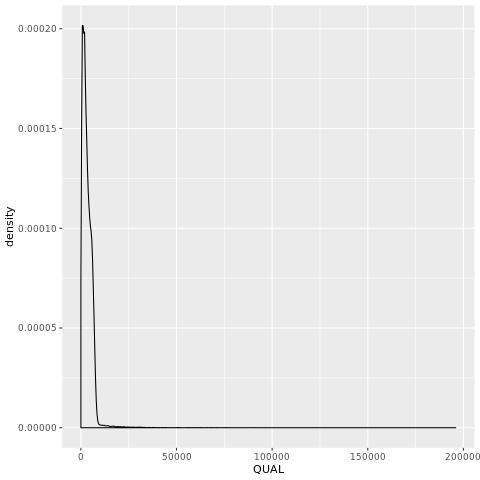

In [44]:
%%R
QUAL_density = makeDensityPlot(motherSNP.giab, "QUAL")
QUAL_density

*Cell 45: Created a second density plot focused on values of QUAL up to 10,000 maximum*

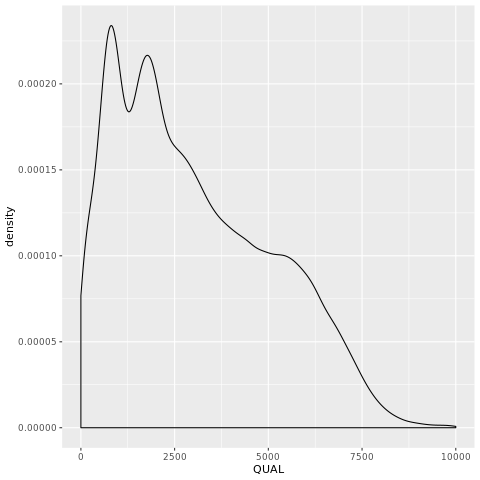

In [45]:
%%R
QUAL_density_zoom = makeDensityPlot(motherSNP.giab, "QUAL", xmax=10000)
QUAL_density_zoom

*Cell 46: Split the variants into subsets based on the number of callsets they were concordant with in GiaB*

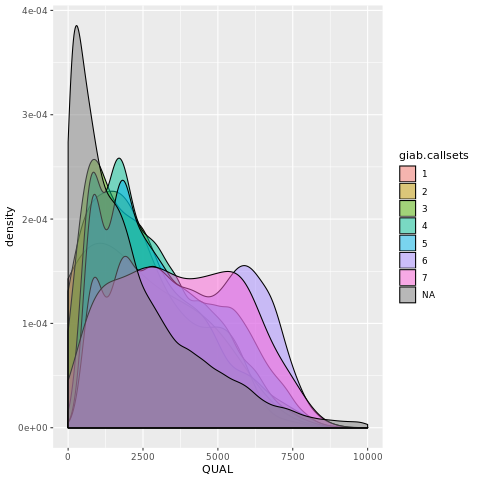

In [46]:
%%R
QUAL_density_split = makeDensityPlot(motherSNP.giab, "QUAL", xmax=10000,
split="giab.callsets")
QUAL_density_split

**Note:** In this exercise, a higher number of concordant callsets is a likely indicator that a variant call is a true positive rather than an artifact.

## Making a Scatter Plot of QUAL Versus DP
We can make scatter plots to visualize the relationship between two annotations. 

*Cell 47: Use the predefined function `makeScatterPlot` to examine the relationship between QUAL and DP*

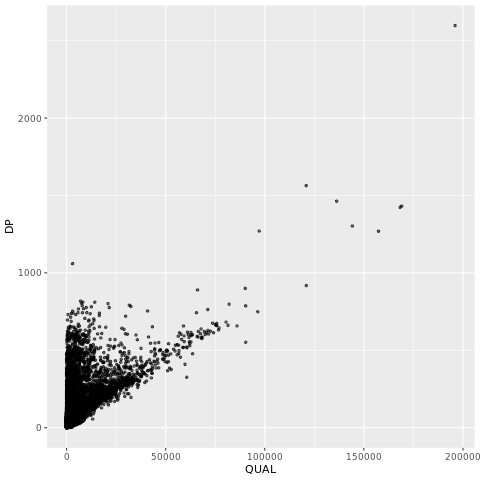

In [47]:
%%R
QUAL_DP_scatterplot = makeScatterPlot(motherSNP.giab, "QUAL", "DP")
QUAL_DP_scatterplot

**Note:** Like above, you can use `xmax` as well as the y-axis equivalent `ymax` to zoom in on ranges of values, and `split` to view the breakdown of the dataa based on the GiaB callsets annotation. 

## Making a Scatter Plot Flanked by Marginal Density Plots
Finally, we can combine the two types of visualizations.

*Cell 48: Use the predefined function `makeScatterPlotWithMarginalDensity` to visualize both annotations' density plots as well as the scatter plot.* 

TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name              grob
1 1 (1-1,1-1) arrange    gtable[layout]
2 2 (1-1,2-2) arrange gtable[guide-box]
3 3 (2-2,1-1) arrange    gtable[layout]
4 4 (2-2,2-2) arrange    gtable[layout]


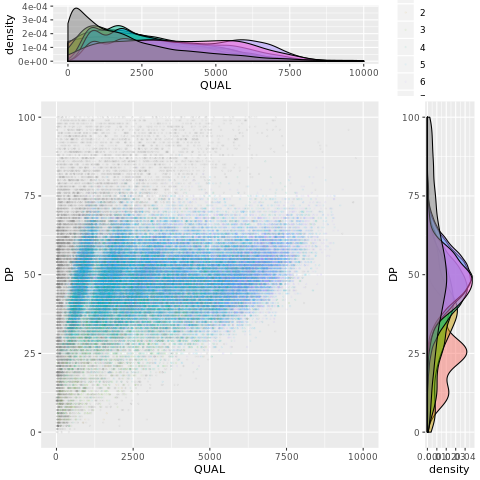

In [48]:
%%R
QUAL_DP_comboplot = makeScatterPlotWithMarginalDensity(motherSNP.giab, "QUAL",
"DP", split="giab.callsets", xmax=10000, ymax=100, ptSize=0.5, ptAlpha=0.05)
QUAL_DP_comboplot

This concludes the visualization section of this notebook.

**Important note**  
This particular method of manipulating and visualizing variant data would not scale well for larger datasets, because it involves reading a potentially very large table directly into memory. We chose it for this tutorial because it has the advantage of being approachable
for newcomers, and our primary goal was to give you a sense of the possibilities and familiarize you with the basic mechanics involved. However, for full-scale work,
you’ll probably want to use more robust methods. We recommend checking out [Hail](https://hail.is), a Python-based, genetics-focused toolkit that is extraordinarily scalable and includes a suite of variant quality control functions, among other capabilities. Like some of the more recent GATK tools, Hail is capable of using Spark to parallelize analysis, and has been used to perform genome-wide analysis studies (GWAS) on massive datasets like the UK Biobank. The Terra Library has a few workspaces that feature Hail, including a set of tutorial notebooks and a [complete GWAS example](https://app.terra.bio/#workspaces/amp-t2d-op/2019_ASHG_Reproducible_GWAS-V2).

----

# Epilogue

Whether you're following along with the Genomics in the Cloud book or not, we encourage you to use this notebook as a starting point to experiment with the tools and approaches that we've introduced here. We plan to add more tutorials on [the book's blog](https://broadinstitute.github.io/genomics-in-the-cloud/) so don't hesitate to suggest topics of interest. 